## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. You are provided with the weekly sales data for their various outlets. 
#### Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

In [2]:
wallmart = pd.read_csv('Walmart DataSet.csv')

In [3]:
wallmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
wallmart['Store'].nunique()

45

In [5]:
wallmart.shape

(6435, 8)

## Rows are:
1. Store
2. Date
3. Weekly Sales
4. Holiday Flag
5. Temperature
6. Fuel Price
7. CPI
8. Unemployment

## Checking and cleaning the dataset if required

In [6]:
wallmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# changing date into proper format
wallmart['Date'] = pd.to_datetime(wallmart['Date'], format= '%d-%m-%Y')

In [8]:
wallmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [9]:
# Checking for duplicate
wallmart.duplicated().sum()

0

In [10]:
# Checking for null value
wallmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
wallmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

### The data looks clear and formated now so we can proceed to further analysis

# EDA

In [12]:
wallmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


C:\Users\shoai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


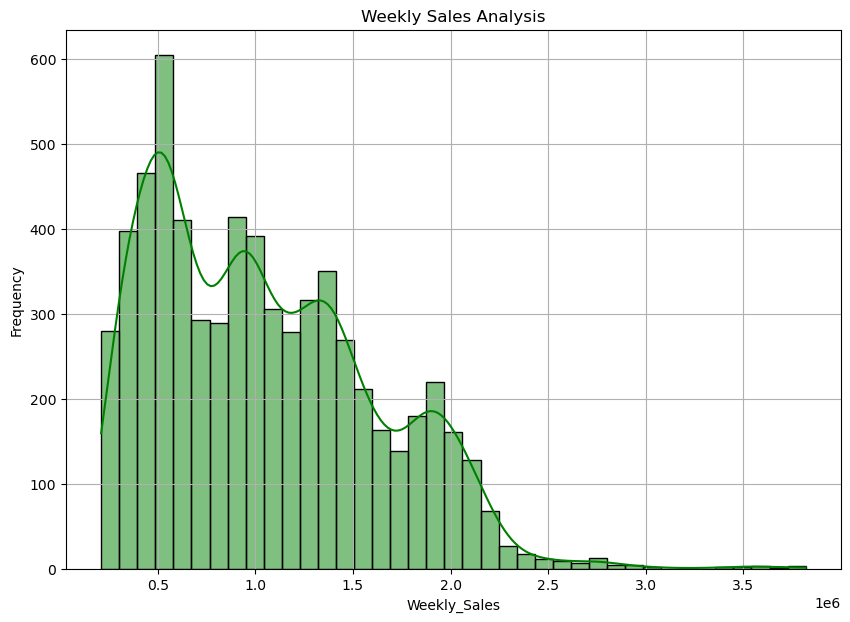

In [13]:
# Weekly sales
plt.figure(figsize=(10,7))
sns.histplot(wallmart['Weekly_Sales'], kde= True, color='green')
plt.ylabel('Frequency')
plt.title("Weekly Sales Analysis")
plt.grid()

Text(0.5, 1.0, 'Time Anaysis Graph')

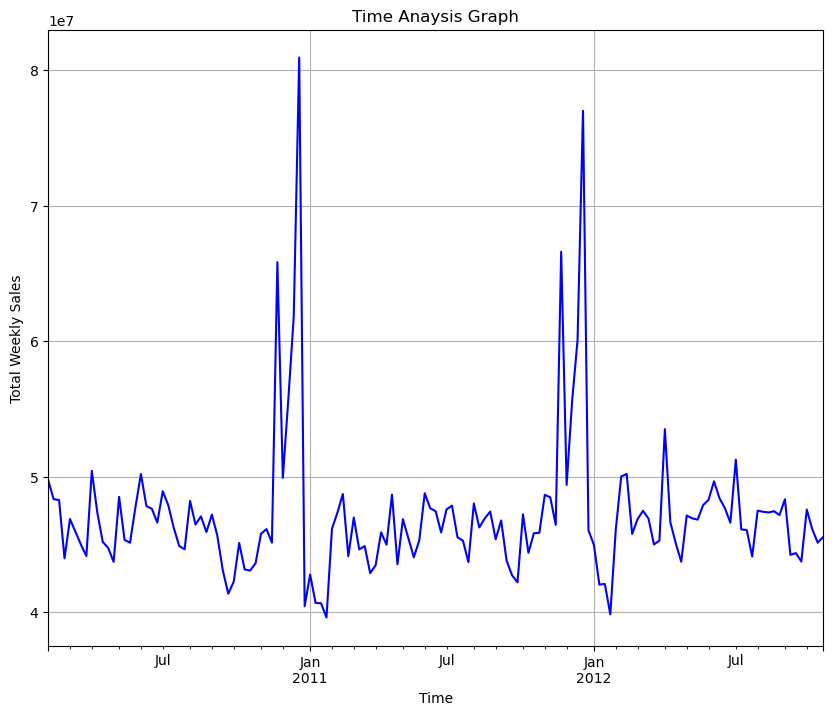

In [14]:
wallmart.head()
wallmart_week = wallmart.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(10,8))
wallmart_week.plot(color = 'blue')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Total Weekly Sales')
plt.title('Time Anaysis Graph')

In [15]:
wallmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


Text(0.5, 1.0, 'Store wise weekly analysis')

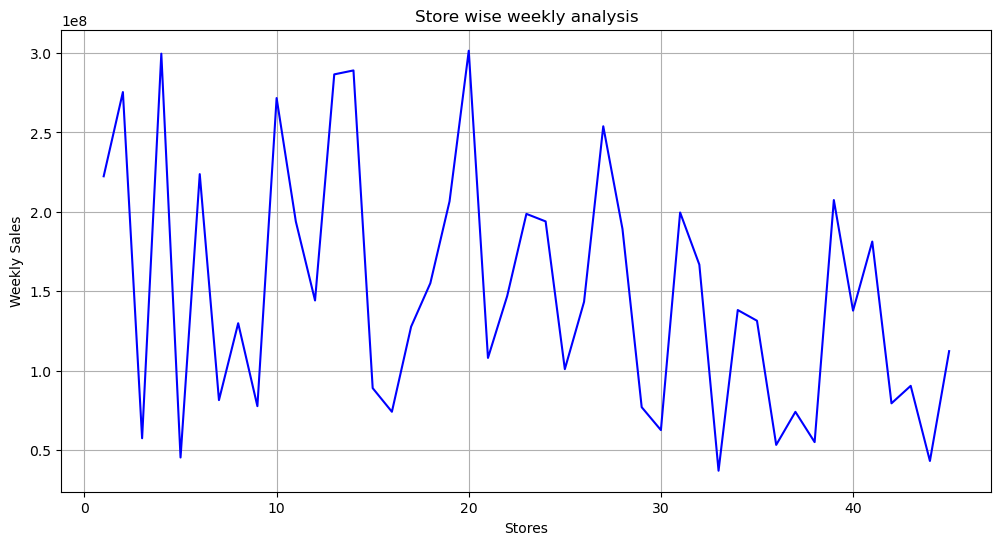

In [16]:
# Store wise weekly Sales analysis
store_weeks = wallmart.groupby('Store')['Weekly_Sales'].sum()
plt.figure(figsize=(12,6))
store_weeks.plot(color = 'Blue')
plt.grid()
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.title('Store wise weekly analysis')

<Axes: >

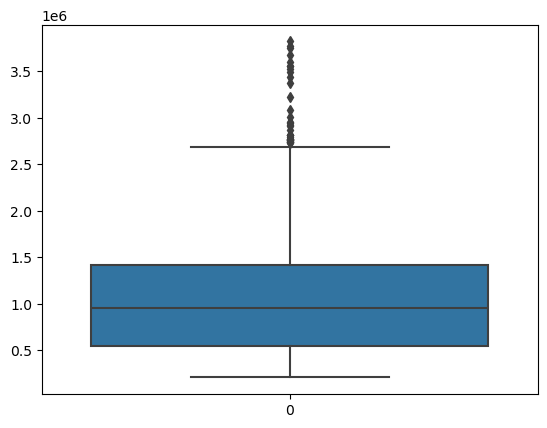

In [17]:
# Finding Outliars

wallmart.head()
sns.boxplot(wallmart['Weekly_Sales'])

In [18]:
wallmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [19]:
corr = wallmart['Weekly_Sales'].corr(wallmart['Unemployment'])
print(f"There is negative correlation which is : {corr}")

There is negative correlation which is : -0.10617608965795419


In [20]:
store_corr = wallmart.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['Unemployment'])
).reset_index(name = "Correlation").sort_values(by = 'Correlation')
store_corr

,Store,Correlation
37,38,-0.785290
43,44,-0.780076
38,39,-0.384681
41,42,-0.356355
40,41,-0.350630
3,4,-0.337015
16,17,-0.263600
2,3,-0.230413
36,37,-0.221287
4,5,-0.207043


In [21]:
print("Top 5 negative correlated stores which are impacted by Unemployment are: ")
store_corr.head()

Top 5 negative correlated stores which are impacted by Unemployment are: 


,Store,Correlation
37,38,-0.785290
43,44,-0.780076
38,39,-0.384681
41,42,-0.356355
40,41,-0.350630


In [22]:
store_sales_summary = store_weeks.reset_index()
store_unemployment_summary = wallmart.groupby('Store')['Unemployment'].mean().reset_index()

<Axes: xlabel='Store', ylabel='Unemployment'>

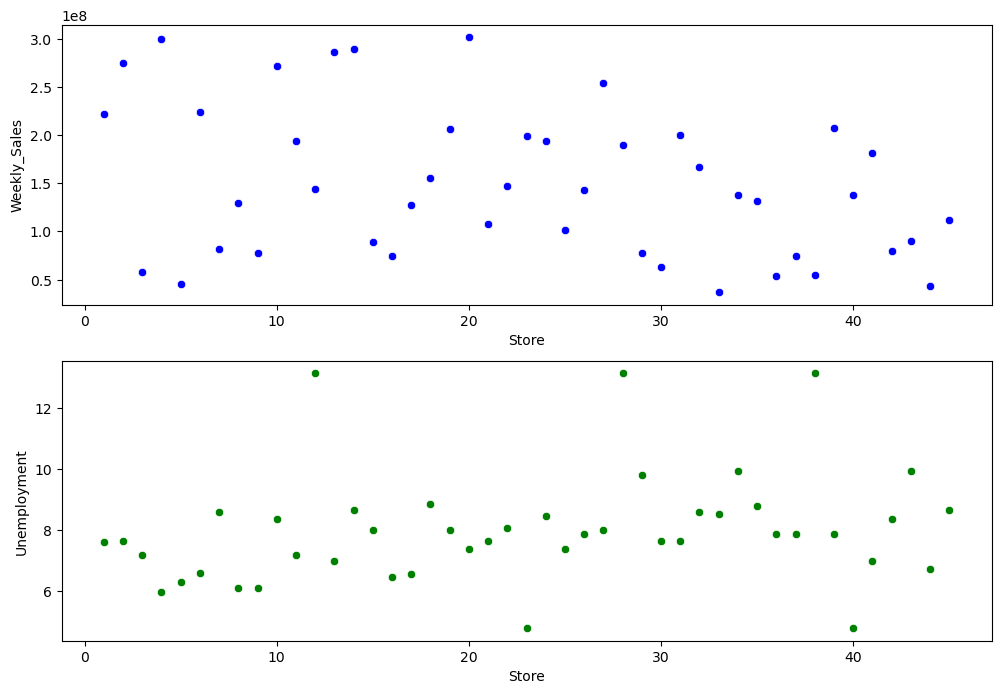

In [23]:
fig, axes = plt.subplots(2,1, figsize = (12,8))
sns.scatterplot(data = store_sales_summary, x = 'Store', y = 'Weekly_Sales', ax = axes[0], color = 'blue')
sns.scatterplot(data = store_unemployment_summary, x = 'Store', y = 'Unemployment', ax = axes[1], color = 'green')

## b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [24]:
wallmart.set_index('Date', inplace = True)

In [25]:
monthly_sales = wallmart['Weekly_Sales'].resample('M').sum()

<Axes: xlabel='Date'>

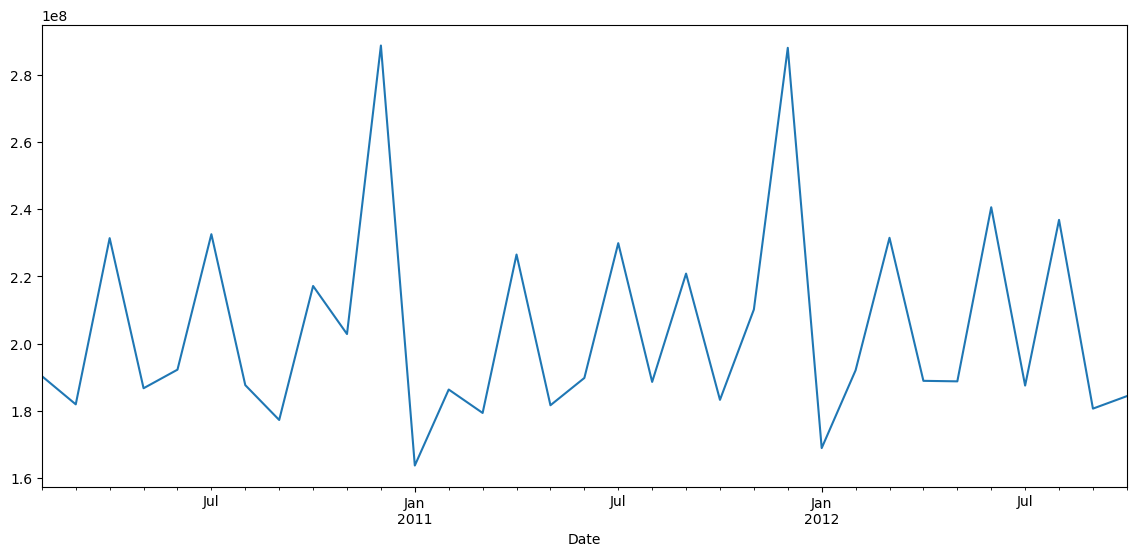

In [26]:
plt.figure(figsize=(14,6))
monthly_sales.plot()

By this graph we can consider as in the month of Nov-Dec the sales is most. We can consider it because on these months there are several festivals like Chrishmas,New Year amd many more

## c. Does temperature affect the weekly sales in any manner?

In [27]:
temp_core = wallmart['Weekly_Sales'].corr(wallmart['Temperature'])
print(f'There is a negative correlation which is {temp_core}')

There is a negative correlation which is -0.0638100131794696


In [28]:
temp_summary = wallmart.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['Temperature'])
).reset_index(name = 'Correlation').sort_values(by = 'Correlation')
temp_summary

,Store,Correlation
9,10,-0.432569
11,12,-0.379416
2,3,-0.377524
27,28,-0.376506
29,30,-0.330816
7,8,-0.312324
36,37,-0.300493
1,2,-0.297673
33,34,-0.278523
10,11,-0.278503


In [29]:
print('Top 5 negative correlated stores are: ')
temp_summary.head()

Top 5 negative correlated stores are: 


,Store,Correlation
9,10,-0.432569
11,12,-0.379416
2,3,-0.377524
27,28,-0.376506
29,30,-0.330816


In [30]:
wallmart.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [31]:
store_weekly_sales = wallmart.groupby('Store')['Weekly_Sales'].sum().reset_index()
temp_sales_summary = wallmart.groupby('Store')['Temperature'].mean().reset_index()

<Axes: xlabel='Store', ylabel='Temperature'>

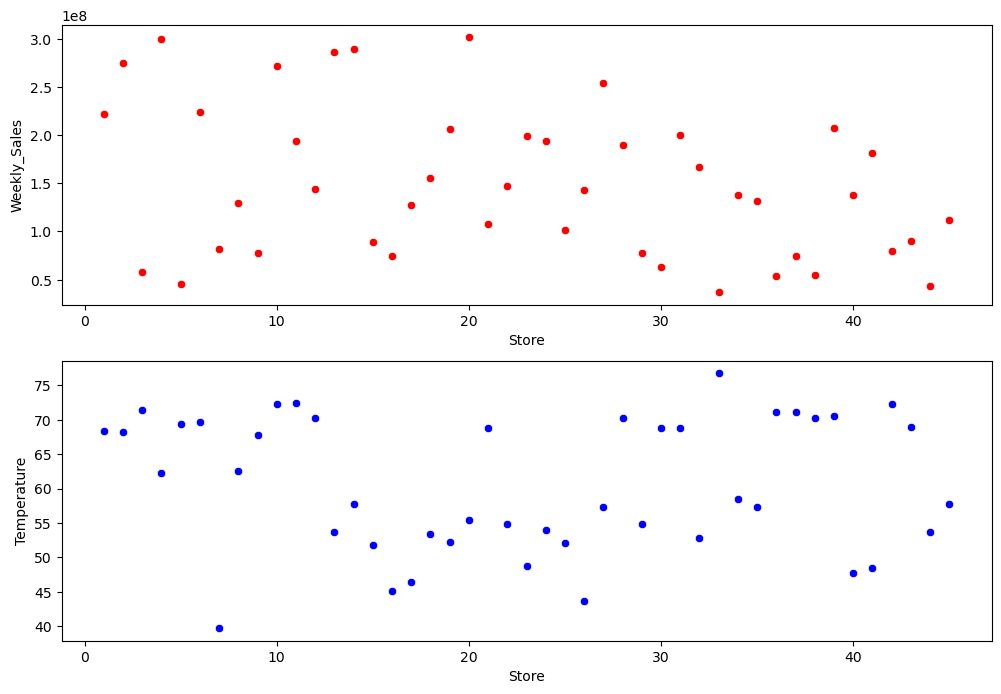

In [32]:
fig, axes = plt.subplots(2,1, figsize = (12,8))
sns.scatterplot(data = store_weekly_sales, x = 'Store', y = 'Weekly_Sales', ax=axes[0], color = 'red')
sns.scatterplot(data = temp_sales_summary, x = 'Store', y = 'Temperature', ax=axes[1], color = 'blue')

## d. How is the Consumer Price index affecting the weekly sales of various stores?

In [33]:
CPI_corr = wallmart['Weekly_Sales'].corr(wallmart['CPI'])
print(f'There is a negative correlation which is: {CPI_corr}')

There is a negative correlation which is: -0.07263416204017631


In [34]:
CPI_summary = wallmart.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['CPI'])
).reset_index(name = 'Correlation').sort_values(by = 'Correlation')
CPI_summary

,Store,Correlation
35,36,-0.915095
34,35,-0.424107
13,14,-0.419755
29,30,-0.298188
42,43,-0.285686
26,27,-0.213082
17,18,-0.193541
14,15,-0.174467
20,21,-0.163649
18,19,-0.155341


In [35]:
print('Top 5 negatively correlated are:')
CPI_summary.head()

Top 5 negatively correlated are:


,Store,Correlation
35,36,-0.915095
34,35,-0.424107
13,14,-0.419755
29,30,-0.298188
42,43,-0.285686


<Axes: xlabel='Store', ylabel='Correlation'>

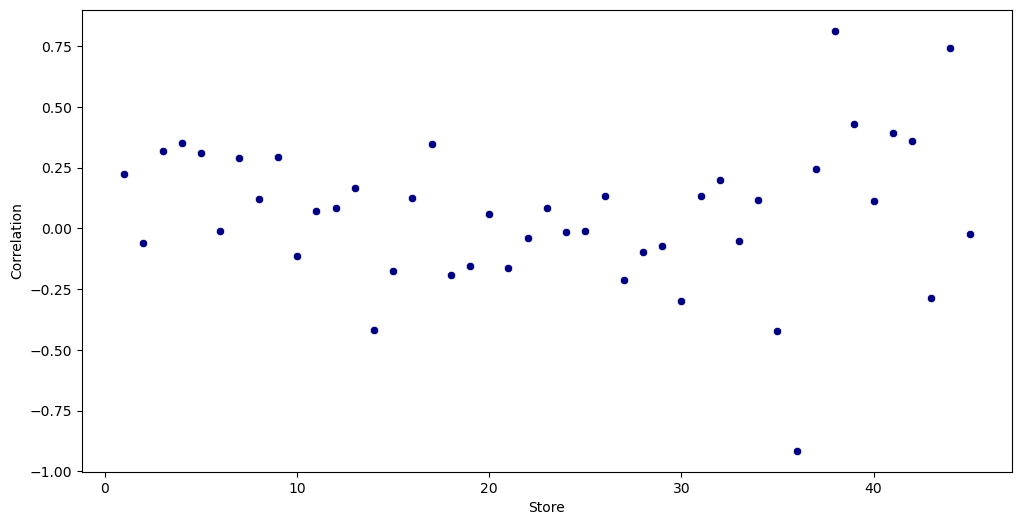

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = CPI_summary, x = 'Store', y = 'Correlation', color = '#000080')

## e. Top performing stores according to the historical data.

In [37]:
print('Top 5 best performing stores according to historical sales are: ')
store_sales_summary.sort_values(by = 'Weekly_Sales', ascending = False).head()

Top 5 best performing stores according to historical sales are: 


,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


## f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [38]:
print('Top 5 best performing stores according to historical sales are: ')
top_5_store = store_sales_summary.sort_values(by = 'Weekly_Sales', ascending = False).head()
top_5_store

Top 5 best performing stores according to historical sales are: 


,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [39]:
print('Top 5 Worst performing stores according to historical sales are: ')
worst_5_store = store_sales_summary.sort_values(by = 'Weekly_Sales').head()
worst_5_store

Top 5 Worst performing stores according to historical sales are: 


,Store,Weekly_Sales
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
37,38,55159626.42


Text(0, 0.5, 'Weekly Sales in Crore')

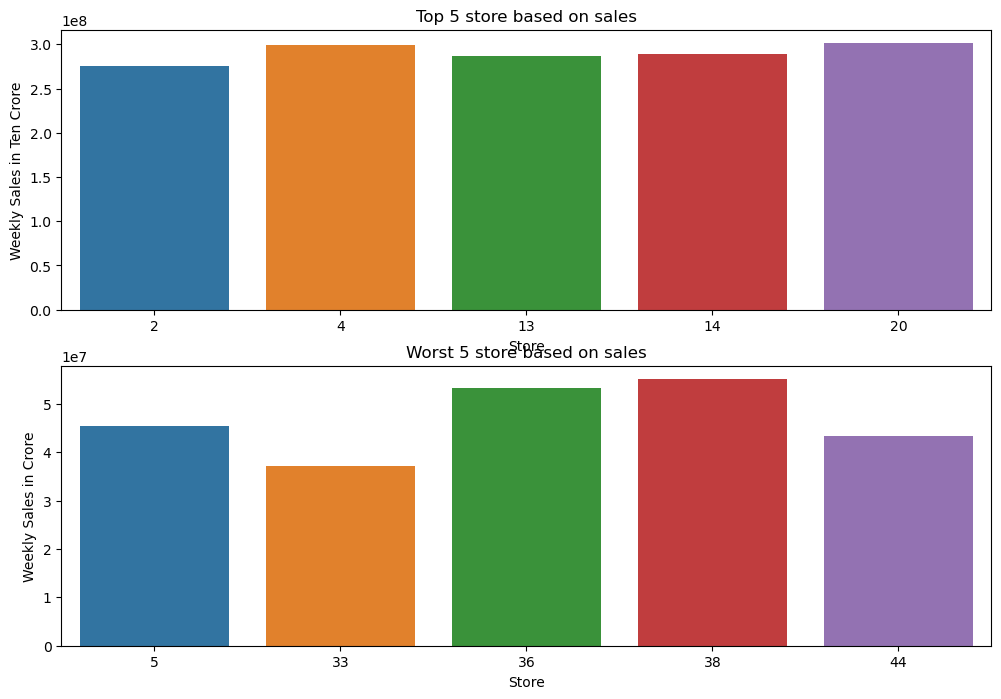

In [40]:
fig, axes = plt.subplots(2,1, figsize = (12,8))
sns.barplot(data = top_5_store, x = 'Store', y = 'Weekly_Sales', ax=axes[0])
axes[0].set_title('Top 5 store based on sales')
axes[0].set_ylabel('Weekly Sales in Ten Crore')
sns.barplot(data = worst_5_store, x = 'Store', y = 'Weekly_Sales', ax = axes[1])
axes[1].set_title('Worst 5 store based on sales')
axes[1].set_ylabel('Weekly Sales in Crore')

# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [41]:
wallmart.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [42]:
#checking the stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
def store_forcast(store_num):
    store_data = wallmart[wallmart['Store'] == store_num]
    if store_num < 45:
        plt.figure(figsize=(12,6))
        sns.lineplot(x = 'Date', y = 'Weekly_Sales', data = store_data)
        plt.title(f'Graph of store number {store_num}')
    result = adfuller(wallmart['Weekly_Sales'])
    if result[1]< 0.05:
        print('Data is stationary')
    else:
        print('Stationary is not present')

C:\Users\shoai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shoai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Data is stationary


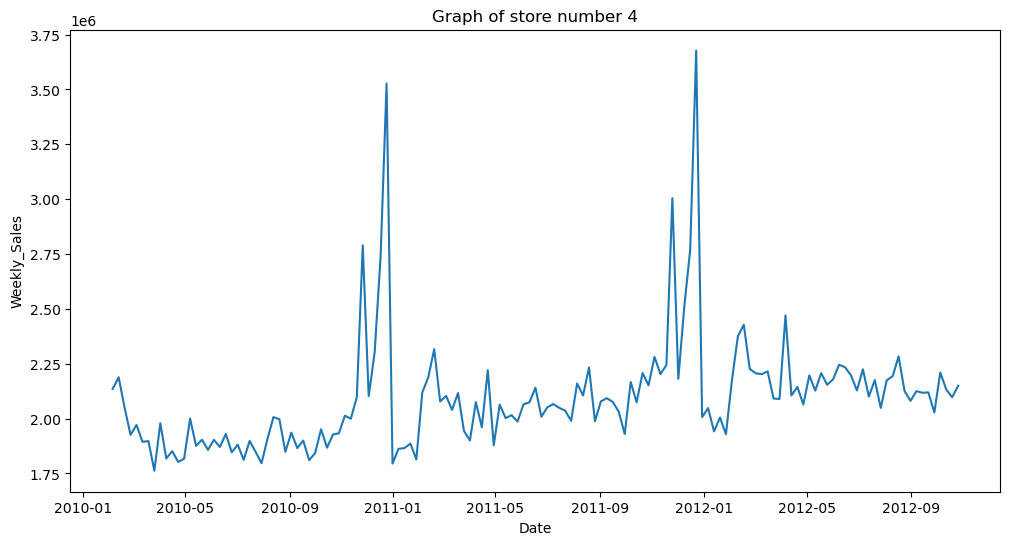

In [44]:
store_forcast(4)

In [45]:
# ! pip install pmdarima

In [50]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [47]:
auto_arima(wallmart['Weekly_Sales'],seasonal = True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=173103.554, Time=6.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=174457.419, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=173626.224, Time=1.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=173359.721, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=174455.423, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=173301.748, Time=3.98 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=173266.524, Time=3.89 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=172741.309, Time=7.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=172905.020, Time=7.39 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=172730.428, Time=16.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=172847.176, Time=5.27 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=172588.751, Time=26.83 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=172597.113, Time=7.28 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=172572.018, Time=15.51 sec
 A

ARIMA(order=(4, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [53]:
def store_forecast(store_number):
    store_data = wallmart[wallmart['Store'] == store_number][['Weekly_Sales']]
    # Fit ARIMA model
    model = ARIMA(store_data['Weekly_Sales'], order=(4,1,5))
    model_fit = model.fit()
    
    # Forecast for the next 12 weeks
    forecast = model_fit.forecast(steps=12)
    
    # Plot the forecast
    plt.figure(figsize=(12,6))
    plt.plot(store_data.index, store_data['Weekly_Sales'], label='Historical Sales')
    plt.plot(pd.date_range(store_data.index[-1], periods=13, freq='W')[1:], forecast, label='Forecast', color='red')
    plt.title(f'Store {store_number} Sales Forecast using ARIMA')
    plt.legend()
    plt.show()
    
    return forecast


C:\Users\shoai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\shoai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\shoai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


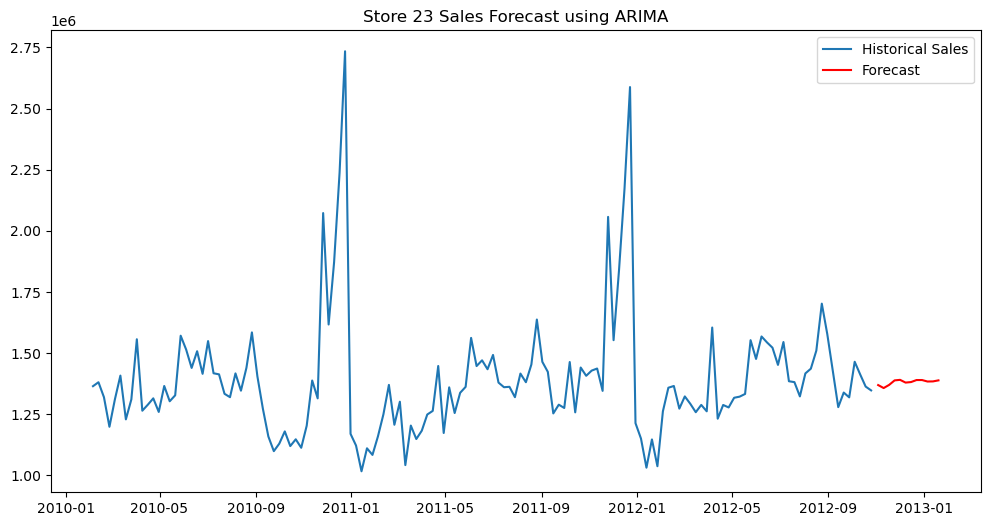

2012-11-02    1.369300e+06
2012-11-09    1.357099e+06
2012-11-16    1.370001e+06
2012-11-23    1.388447e+06
2012-11-30    1.390606e+06
2012-12-07    1.379438e+06
2012-12-14    1.381596e+06
2012-12-21    1.389889e+06
2012-12-28    1.389884e+06
2013-01-04    1.383829e+06
2013-01-11    1.384280e+06
2013-01-18    1.388524e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [54]:
store_forecast(23)